### 데이터의 불균형 문제 처리 
- 정상을 정확하게 분류하는 것과 이상을 정확하게 분류하는 것 중 일반적으로 이상을 정확히 분류하는 것이 중요
- 보통 이상 데이터가 target데이터로 사용하는 경우가 많다. 
- 데이터가 분균형할때는 분류의 성능과 target 데이터를 정확히 분류해내는 목표가 일치하지 않게 된다. 
- 이러한 경우 분석 결과의 해석 뿐만이 아니라 머신러닝 등 모델링에서 문제가 발생 
- 소수의 데이터인 target의 중요를 낮게 판단하게 되므로 궁금적으로 분석가능한 모델을 생성 할수 없다. 
- 이러한 문제를 해결하기 위해 소수의 비정상 데이터를 늘리는 오버 샘플링, 상대적으로 많은 데이터에서 일부만 사용하는 언더 샘플링이 존재

In [629]:
# 라이브러리 설치 
# !pip install imbalanced-learn

#### 언더 샘플링 
- 다수의 라벨을 가진 데이터를 샘플링하여 소수의 데이터 세트가 가진 라벨의 수 수준으로 감소시키는 방법 
- 이 기법은 데이터 불균형 문제는 해결이 가능하지만 전체 데이터의 개수가 줄어들어서 학습 성능이 떨어질수 있다

In [630]:
import numpy as np 
import pandas as pd

from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [631]:
# 랜덤 데이터셋을 하나 생성
# 90 : 10 비율로 생성 

x, y = make_classification(n_samples=2000, 
                           n_features=5, 
                           weights=[0.9], 
                           flip_y=0)

In [632]:
Counter(y)

Counter({0: 1801, 1: 199})

In [633]:
# 랜덤 언더 샘플링
# 다수의 데이터를 소수의 데이터의 개수만큼 줄어주는 작업 
undersampler = RandomUnderSampler()

In [634]:
x_under, y_under = undersampler.fit_resample(x, y)

In [635]:
Counter(y_under)

Counter({0: 199, 1: 199})

In [636]:
# sampling_strategy 매개변수 : 
# 소수의 데이터의 비율을 지정하여 다수의 데이터의 개수를 정한다
undersampler2 = RandomUnderSampler(sampling_strategy=0.3)
x_under2 , y_under2 = undersampler2.fit_resample(x, y)

In [637]:
Counter(y_under2)

Counter({0: 663, 1: 199})

#### 오버 샘플링 
- 소수의 데이터를 다수의 데이터의 개수만큼 증식시켜 학습에 사용하기 위한 방법 
- 데이터의 손실이 없기때문에 일반적으로 언더 샘플링보다 성능이 유리하여 주로 사용

In [638]:
# 랜덤 오버 샘플링 
# 소수의 데이터를 단순 복제하여 다수의 데이터의 개수와 비율을 맞춰주는 방법
# 데이터를 단순하게 복제하기 때문에 분포가 변하지 않는다. 
# 수가 증가 하기때문에 가중치 발생
# 오버피팅의 위험성은 존재하지만 불균형 문제를 처리하지 않는거보다는 유효
from imblearn.over_sampling import RandomOverSampler

In [639]:
oversample = RandomOverSampler()

In [640]:
x_over, y_over = oversample.fit_resample(x, y)

In [641]:
Counter(y_over)

Counter({0: 1801, 1: 1801})

In [642]:
oversample2 = RandomOverSampler(sampling_strategy=0.5)

In [643]:
x_over2, y_over2 = oversample2.fit_resample(x, y)

In [644]:
Counter(y_over2)

Counter({0: 1801, 1: 900})

In [645]:
# SMOTE(Synthetic Minority Over-sampling Technique)
# 소수의 데이터의 관측 값에 대한 K개의 최근접 앙수을 이웃을 찾고, 
# 관측 값과 이웃으로 선택된 값 사이에 임의의 새로운 데이터를 생성하는 방법
from imblearn.over_sampling import SMOTE

In [646]:
smote_sample = SMOTE()

In [647]:
x_sm , y_sm = smote_sample.fit_resample(x, y)

In [648]:
Counter(y_sm)

Counter({0: 1801, 1: 1801})

In [649]:
import matplotlib.pyplot as plt
import seaborn as sns

In [650]:
x[:, 1]

array([-2.02731051,  0.60853075, -1.0664613 , ..., -1.14045964,
       -1.87476964, -1.25996513])

c:\Users\moons\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\moons\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\moons\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\moons\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

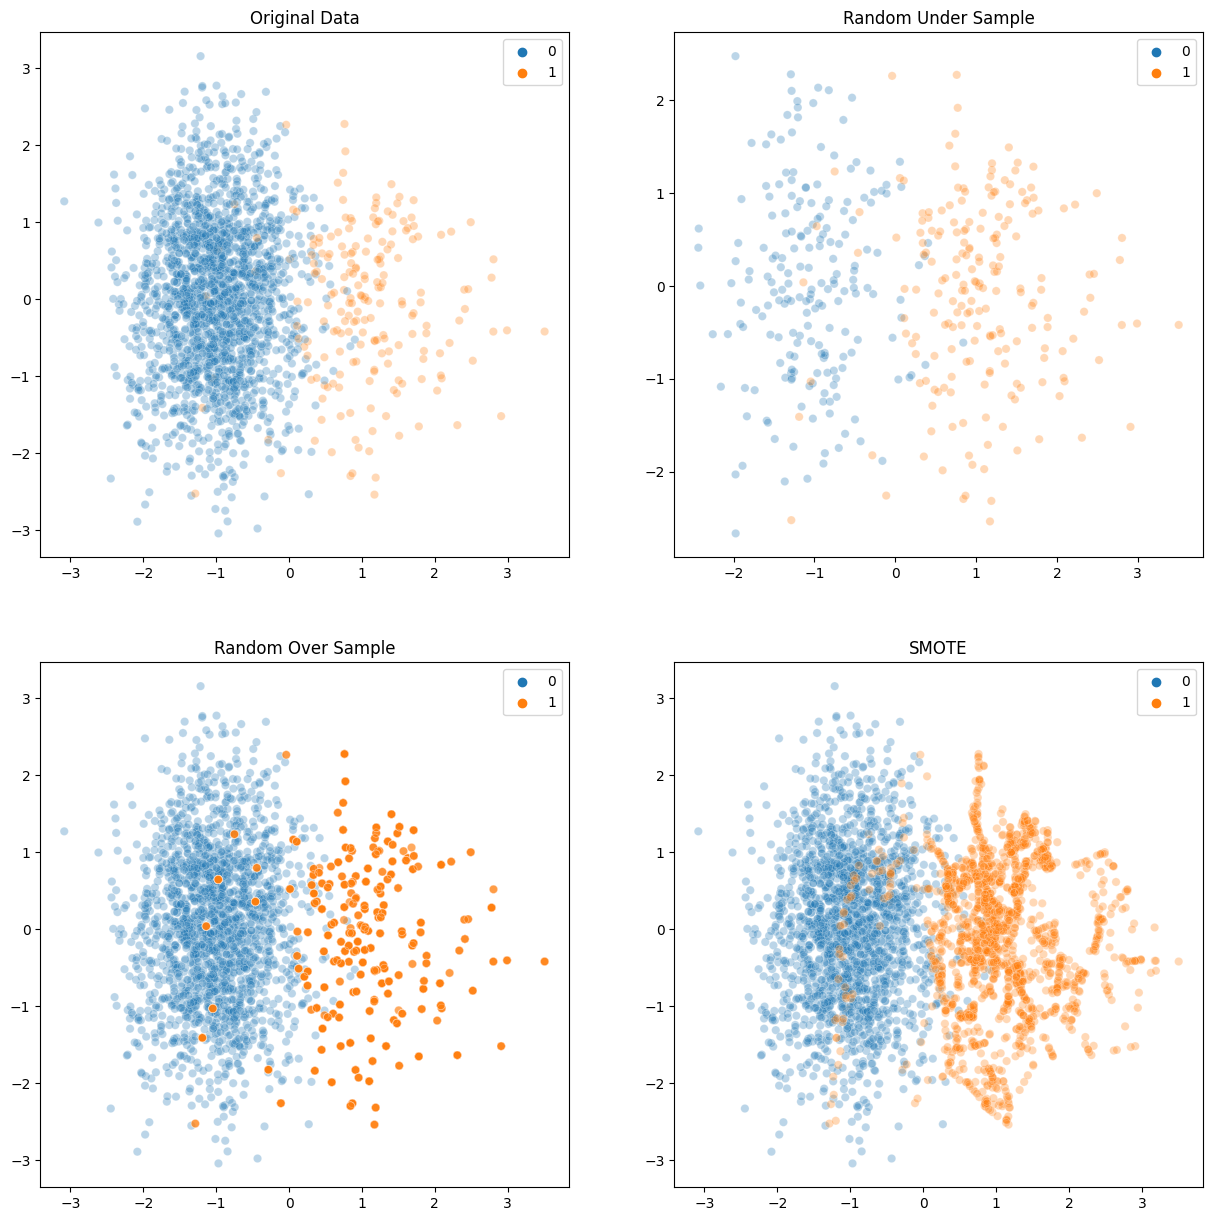

In [651]:
# 서브 플롯 4개 생성 그래프 사이즈 변경 
fig, axes = plt.subplots( nrows = 2, ncols = 2, figsize = (15, 15))

# 산점도 그래프 4개를 생성 
# subplot에 대입 
sns.scatterplot(x = x[:, 1], y = x[:, 2] ,ax = axes[0][0], hue=y, alpha = 0.3)
sns.scatterplot(x = x_under[:, 1], y = x_under[:, 2], hue=y_under, 
             alpha=0.3, ax = axes[0][1])
sns.scatterplot(x = x_over[:, 1], y = x_over[:, 2], hue=y_over, 
             alpha = 0.3, ax = axes[1][0])
sns.scatterplot(x = x_sm[:, 1], y = x_sm[:, 2], hue=y_sm, 
             alpha = 0.3, ax = axes[1][1])
axes[0][0].set_title('Original Data')
axes[0][1].set_title('Random Under Sample')
axes[1][0].set_title('Random Over Sample')
axes[1][1].set_title('SMOTE')

plt.show()